<a href="https://colab.research.google.com/github/shahparth0007/Google_Collab_Files/blob/main/Shopify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***Shopify Summer 2022 Data Science Intern Challenge***

---



### **Question 1:** Given some sample data, write a program to answer the following:

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

a.	Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

b.	What metric would you report for this dataset?

c.	What is its value?


**Answer**: After every code explaination has been written to provide the answers for above question

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('/content/Shopify.xlsx')

In [3]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


In [4]:
# Verify Average Order Value is $3145.13
print('Average Order Value:', df['order_amount'].mean())

Average Order Value: 3145.128


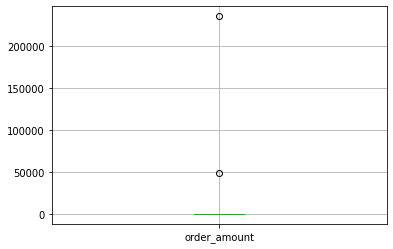

In [5]:
average_value_stores = df[['order_amount','shop_id']].groupby('shop_id').mean()
average_value_stores.boxplot(column=['order_amount'])

,total_items
1,1830
2,1832
3,941
4,293
5,77
6,9
8,1
2000,17


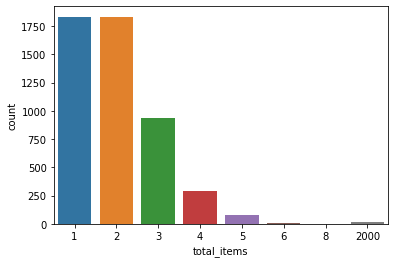

In [6]:
#View the distribution of order sizes.
sns.countplot(x='total_items', data=df)
pd.DataFrame(df['total_items'].value_counts().sort_index())

We can see there are 17 rows with 2000 total_items which is skweing the data on HIgher Side.


Next we see what are the distinct shoe prices in our dataset

In [7]:
df['Per_item'] = df['order_amount']/df['total_items']
pd.DataFrame(df['Per_item'].describe())

,Per_item
count,5000.000000
mean,387.742800
std,2441.963725
min,90.000000
25%,133.000000
50%,153.000000
75%,169.000000
max,25725.000000


We have a shoe price of 25,725 in our dataset which is a huge amount. Lets see who is selling this

In [8]:
df[df['order_amount'] == 25725]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,Per_item
160,161,78,990,25725,1,credit_card,2017-03-12 05:56:56.834,25725.0
1056,1057,78,800,25725,1,debit,2017-03-15 10:16:44.830,25725.0
1193,1194,78,944,25725,1,debit,2017-03-16 16:38:25.551,25725.0
1204,1205,78,970,25725,1,credit_card,2017-03-17 22:32:21.438,25725.0
1384,1385,78,867,25725,1,cash,2017-03-17 16:38:06.279,25725.0
1419,1420,78,912,25725,1,cash,2017-03-30 12:23:42.551,25725.0
1452,1453,78,812,25725,1,credit_card,2017-03-17 18:09:54.089,25725.0
2270,2271,78,855,25725,1,credit_card,2017-03-14 23:58:21.635,25725.0
2548,2549,78,861,25725,1,cash,2017-03-17 19:35:59.663,25725.0
2773,2774,78,890,25725,1,cash,2017-03-26 10:36:43.445,25725.0


SHOP ID: 78 is selling a shoe at 25725 which can either be fraud or is an outlier to our dataset and should be treated before calculating any metrics

To Evaluate this data, we need to answer following questions:

1)	Are these outlier values true or just a system glitch while updating the data?

If they are system glitch, we can follow following procedures to calculate AOV

a)	Replace the outlier values using IQR (inter quantile range) and then calculate the AOV.

STEP 1: Calculate Q1 and Q3 from the average sales

STEP 2: Clip the values in between 1.5(Q3-Q1) – Q1 and 1.5(Q3-Q1) + Q3 

STEP 3: Calculate the average

New value with IQR: 306.03

In [11]:
q3, q1 = np.percentile(df['order_amount'], [75 ,25])
IQR = q3 - q1
Upper_Limit = q3+1.5*IQR
Lower_Limit = q1-1.5*IQR
df['order_amount']=np.where(df['order_amount'] > Upper_Limit ,Upper_Limit,df['order_amount'])
df['order_amount']=np.where(df['order_amount']< Lower_Limit ,Lower_Limit,df['order_amount'])
print("Average Value after outlier Treatment:",df['order_amount'].mean())

Average Value after outlier Treatment: 306.0327


If the outlier values are not a system glitch and they are verified value then we should report **median** for this data. As median is not affected by outliers so much. 

1) We will take **median** of the average value of all stores without removing anything.

In [9]:
# Display Median Order Value
print('Median Order Value:', df['order_amount'].median())

Median Order Value: 284.0


2) We can delete the store 78 and stores with total item 2000 for a better representation of the Average value. (if we do not want to use median)

In [10]:
data_WO_Outlier = df[df['shop_id'] != 78]
print('Median order Value after removing shoe price outier',data_WO_Outlier['order_amount'].median())
data_WO_Outlier = data_WO_Outlier[data_WO_Outlier['total_items'] != 2000]
print('Average order Value after removing shoe price outier and 2000 orders',data_WO_Outlier['order_amount'].mean())


Median order Value after removing shoe price outier 284.0
Average order Value after removing shoe price outier and 2000 orders 302.58051448247926


It is also very prudent to group sellers based on the sales and then report AOV for different groups.

### Conclusion:

1) Median Order Value is the best way to report the metric when we know the data is outlier. So 284 is the Median Order Value.

2) If the outliers are a fraud/or something which we are not interested to represent an overall number, we should:


*   Treat Them:

    Average Order Value after treating outliers: 306.037
*   Delete Them:

    Average Order Value after deleting outliers: 302.58


## **Question 2**

---

Question 2: For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.
:

### Question 2A:

---



How many orders were shipped by Speedy Express in total? 


---



**Answer 2A: 54**

Query: SELECT COUNT(*) FROM ORDERS a JOIN Shippers b ON a.ShipperID = b.ShipperID WHERE ShipperName = "Speedy Express"

### Question 2B: 

---


What is the last name of the employee with the most orders? 


---



**Answer 2B: Peacock**

Method: As w3 schools do not use WITH statements, i had to use sub queries. 
Here this query helps us to retrieve last name of all the employees with most orders

SELECT * FROM

(SELECT LastName,count(1) AS CNT FROM Orders A


LEFT JOIN Employees B
ON A.EmployeeID = B.EmployeeID
group by LastName)AA


WHERE AA.CNT = (SELECT MAX(CNT) FROM
(SELECT LastName,count(1) AS CNT FROM Orders A


LEFT JOIN Employees B
ON A.EmployeeID = B.EmployeeID
group by LastName))



### Question 2C: 


---


What product was ordered the most by customers in Germany?

---



**Answer 2C: Gorgonzola Telino**

Query: 

SELECT TOP 1 ProductName FROM


(SELECT Productname FROM 


(SELECT * FROM


(SELECT * FROM ORDERS A
LEFT JOIN ORDERDETAILS B
ON A.ORDERID = B.ORDERID)C


LEFT JOIN PRODUCTS D
ON C.PRODUCTID = D.PRODUCTID)E


LEFT JOIN CUSTOMERS F
ON E.CUSTOMERID = F.CUSTOMERID
where country = 'GERMANY'
group by productname
order by count(1) desc)

